In this notebook I'm going to implement some of the fundamentals concerning (pseudo) spectral methods from scratch, using numpy.

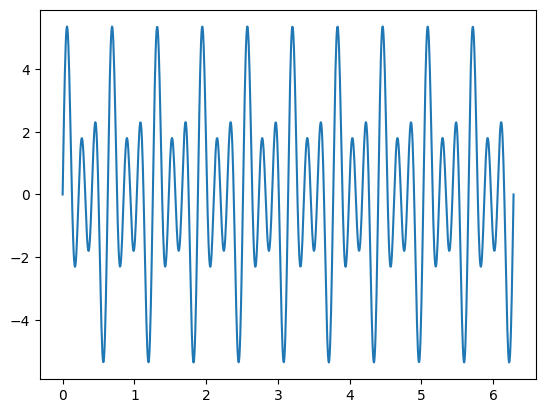

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import time
'''Intro to DFT with example on finding frequency spectra of simple function'''

def f(x):
    return 1*np.sin( 10* x) + 2*np.sin(20*x) + 3*np.sin(30*x)
N = 1024
x = np.linspace(0, 2*np.pi, N)
y = f(x)
plt.plot(x, y)
plt.show()

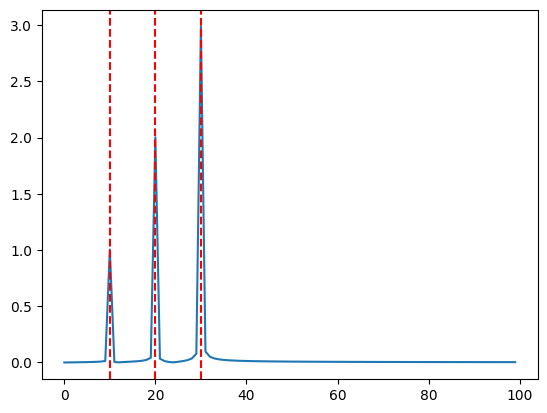

Frequency: 10, Coefficient: 1.0
Frequency: 20, Coefficient: 2.0
Frequency: 30, Coefficient: 2.99
Time taken for DFT:  0.9491207599639893


In [61]:
'''A simple implementation of the Discrete Fourier Transform (DFT)'''
start_time = time.time()
def simple_dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            '''Notice the nested for loop! This is responsible for the O(N^2) complexity of the DFT.'''
            c[k] += y[n] * np.exp(-2j * np.pi * k * n / N)
        c[k] /= (N/2)  # Divide by N/2 to get the correct scaling
    return c

c = simple_dft(y)
plt.plot(np.abs(c[:100]))
for i in [10, 20, 30]:
    plt.axvline(x=i, color='r', linestyle='--')
plt.show()


#find all frequencies with non-zero coefficients
def find_frequencies(y):
    N = len(y)
    c = simple_dft(y)
    frequencies = []
    for k in range(N//2+1):
        if np.abs(c[k]) > 1e-1:
            frequencies.append(k)
    return frequencies

freqs = find_frequencies(y)

#print all found frequencies and their coefficients
for freq in freqs:
    coef = c[freq]
    #round to nearest integer
    coef = np.round(np.abs(coef), 2)
    print(f"Frequency: {freq}, Coefficient: {coef}")
end_time = time.time()
print("Time taken for DFT: ", end_time - start_time)



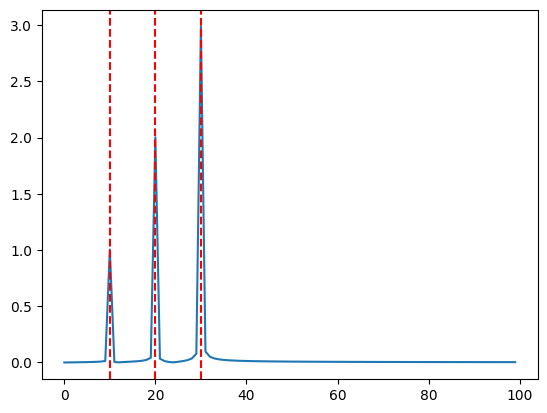

Frequency: 10, Coefficient: 1.0
Frequency: 20, Coefficient: 2.0
Frequency: 30, Coefficient: 2.99
Time taken for DFT:  0.5095076560974121


In [62]:
'''Computing the DFT can also be done using matrix multiplication
And checking that it gives the same result as the simple DFT implementation.
This will be faster than the simple DFT implementation (due to under the hood vector parallelism from numpy), but still has O(N^2) complexity.'''
start_time = time.time()
def simple_matrix_dft(y):
    N = len(y)
    k = np.arange(N) #generate vector of indices [0, 1, 2, ..., N-1]
    n = k.reshape((N, 1)) #reshape k into a column vector
    
    M = np.exp(-2j * np.pi * k * n / N) #constructs the DFT matrix, where each element M[k, n] is given by exp(-2j * pi * k * n / N)
    c = np.dot(M, y)
    
    return c / (N/2)

c = simple_matrix_dft(y)
plt.plot(np.abs(c[:100]))
for i in [10, 20, 30]:
    plt.axvline(x=i, color='r', linestyle='--')
plt.show()


#find all frequencies with non-zero coefficients
def find_frequencies(y):
    N = len(y)
    c = simple_dft(y)
    frequencies = []
    for k in range(N//2+1):
        if np.abs(c[k]) > 1e-1:
            frequencies.append(k)
    return frequencies

freqs = find_frequencies(y)

#print all found frequencies and their coefficients
for freq in freqs:
    coef = c[freq]
    #round to nearest integer
    coef = np.round(np.abs(coef), 2)
    print(f"Frequency: {freq}, Coefficient: {coef}")
end_time = time.time()
print("Time taken for DFT: ", end_time - start_time)

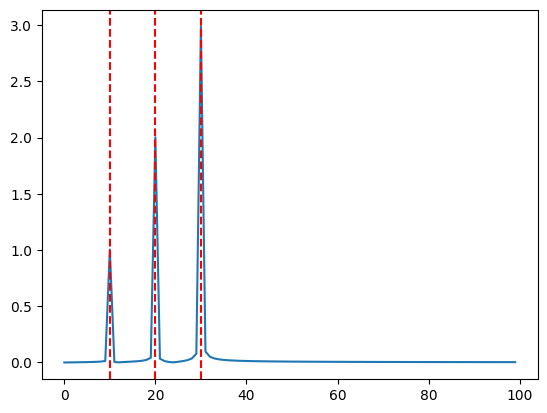

Frequency: 10, Coefficient: 1.0
Frequency: 20, Coefficient: 2.0
Frequency: 30, Coefficient: 2.99
Time taken for DFT:  0.4551699161529541


In [79]:
'''Example implementation of the Fast Fourier Transform (FFT) using the Cooley-Tukey algorithm.'''
start_time = time.time()
import numpy as np

def cooley_tukey_fft(x, N=None, s=1):
    if N is None:
        N = len(x)

    # Base case: If N is 1, return the input signal
    if N == 1:
        return x 

    # Split the input signal into even and odd indices
    even_indices = np.arange(0, N, 2)
    odd_indices = np.arange(1, N, 2)
    #DIVIDE AND CONQUER RECURSION
    X_even = cooley_tukey_fft(x[even_indices], N//2, 2*s)
    X_odd = cooley_tukey_fft(x[odd_indices], N//2, 2*s)

    # Create the twiddle factors
    twiddle = np.exp(-2j * np.pi * np.arange(N//2) / N)

    # Combine the even and odd parts with twiddle factors
    X = np.zeros(N, dtype=complex)
    for k in range(N//2):
        X[k] = X_even[k] + twiddle[k] * X_odd[k]
        X[k + N//2] = X_even[k] - twiddle[k] * X_odd[k]

    return X

c = cooley_tukey_fft(y, N, 1) / (N/2)
plt.plot(np.abs(c[:100]))
for i in [10, 20, 30]:
    plt.axvline(x=i, color='r', linestyle='--')
plt.show()

#find all frequencies with non-zero coefficients
def find_frequencies(y):
    N = len(y)
    c = simple_dft(y)
    frequencies = []
    for k in range(N//2+1):
        if np.abs(c[k]) > 1e-1:
            frequencies.append(k)
    return frequencies

freqs = find_frequencies(y)

#print all found frequencies and their coefficients
for freq in freqs:
    coef = c[freq]
    #round to nearest integer
    coef = np.round(np.abs(coef), 2)
    print(f"Frequency: {freq}, Coefficient: {coef}")
end_time = time.time()
print("Time taken for DFT: ", end_time - start_time)
